# THE SPARK FOUNDATION - GRIP Program

# TASK-5:  Traffic Sign Classification System
Implement a real time traffic sign classifier which identifies the traffic sign

# Author : Rammya Dharshini K
Email Id: rammyadharshinik@gmail.com

Linkedin Id: https://www.linkedin.com/in/rammya-dharshini-k-95b74318b/
 
Github Profile: https://github.com/rammya29


# Importing modules

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import keras 
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten 
from keras.layers.convolutional import Conv2D, MaxPooling2D 
from keras.optimizers import Adam 
from keras.utils.np_utils import to_categorical 
from keras.preprocessing.image import ImageDataGenerator 
import pickle 
import pandas as pd 
import random 
import cv2 

np.random.seed(0) 


# Loading the data set

In [2]:
# Read data 
data = pd.read_csv("signnames.csv") 

with open('train.p', 'rb') as f: 
    train_data = pickle.load(f) 
with open('valid.p', 'rb') as f: 
    val_data = pickle.load(f) 
with open('test.p', 'rb') as f: 
    test_data = pickle.load(f) 

# Extracting the labels from the dictionaries 
X_train, y_train = train_data['features'], train_data['labels'] 
X_val, y_val = val_data['features'], val_data['labels'] 
X_test, y_test = test_data['features'], test_data['labels'] 

# Printing the shapes 
print(X_train.shape) 
print(X_val.shape) 
print(X_test.shape) 


(34799, 32, 32, 3)
(4410, 32, 32, 3)
(12630, 32, 32, 3)


# Preprocessing the data using OpenCV

In [3]:
def preprocessing(img): 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
    img = cv2.equalizeHist(img) 
    img = img / 255
    return img 

X_train = np.array(list(map(preprocessing, X_train))) 
X_val = np.array(list(map(preprocessing, X_val))) 
X_test = np.array(list(map(preprocessing, X_test))) 

X_train = X_train.reshape(34799, 32, 32, 1) 
X_val = X_val.reshape(4410, 32, 32, 1) 
X_test = X_test.reshape(12630, 32, 32, 1) 


In [4]:
datagen = ImageDataGenerator(width_shift_range = 0.1, height_shift_range = 0.1, zoom_range = 0.2, shear_range = 0.1, 
                             rotation_range = 10) 
datagen.fit(X_train) 

y_train = to_categorical(y_train, 43) 
y_val = to_categorical(y_val, 43) 
y_test = to_categorical(y_test, 43) 


# Building the model

In [5]:
num_classes = 43

def cnn_model(): 
    model = Sequential() 
    model.add(Conv2D(60, (5, 5), input_shape =(32, 32, 1), activation ='relu')) 

    model.add(Conv2D(60, (5, 5), activation ='relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 
    
    model.add(Conv2D(30, (3, 3), activation ='relu')) 
    model.add(Conv2D(30, (3, 3), activation ='relu')) 
    model.add(MaxPooling2D(pool_size =(2, 2))) 
    
    model.add(Flatten()) 
    model.add(Dense(500, activation ='relu')) 
    model.add(Dropout(0.5)) 
    model.add(Dense(num_classes, activation ='softmax')) 
    
# Compile model 
    model.compile(Adam(lr = 0.001), loss ='categorical_crossentropy', metrics =['accuracy']) 
    return model 

model = cnn_model() 
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size = 50), steps_per_epoch = 200, 
                              epochs = 10, validation_data =(X_val, y_val), shuffle = 1) 


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
200/200 [==============================] - 1102s 6s/step - loss: 2.9951 - accuracy: 0.1943 - val_loss: 1.6167 - val_accuracy: 0.5156
Epoch 2/10
200/200 [==============================] - 1031s 5s/step - loss: 1.5785 - accuracy: 0.5337 - val_loss: 0.6506 - val_accuracy: 0.8134
Epoch 3/10
200/200 [==============================] - 1018s 5s/step - loss: 1.0204 - accuracy: 0.6891 - val_loss: 0.3793 - val_accuracy: 0.8871
Epoch 4/10
200/200 [==============================] - 1019s 5s/step - loss: 0.7336 - accuracy: 0.7717 - val_loss: 0.2120 - val_accuracy: 0.9454
Epoch 5/10
200/200 [==============================] - 1014s 5s/step - loss: 0.5856 - accuracy: 0.8171 - val_loss: 0.1775 - val_accuracy: 0.9415
Epoch 6/10
200/200 [==============================] - 1022s 5s/step - loss: 0.4599 - accuracy: 0.8605 - val_loss: 0.1768 - val_accuracy: 0.9417
Epoch 7/10
200/200 [==============================] - 1026s 

# Evaluation and testing

Text(0.5, 0, 'epoch')

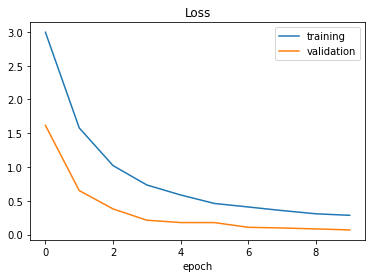

In [6]:
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss']) 
plt.legend(['training', 'validation']) 
plt.title('Loss') 
plt.xlabel('epoch') 


Text(0.5, 0, 'epoch')

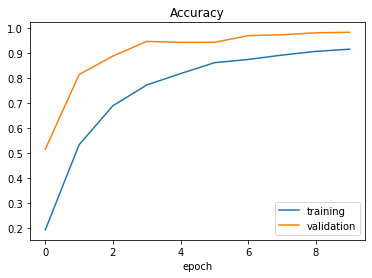

In [8]:
plt.plot(history.history['accuracy']) 
plt.plot(history.history['val_accuracy']) 
plt.legend(['training', 'validation']) 
plt.title('Accuracy') 
plt.xlabel('epoch') 


In [9]:
score = model.evaluate(X_test, y_test, verbose = 0) 
print('Test Loss: ', score[0]) 
print('Test Accuracy: ', score[1]) 


Test Loss:  0.14203670620918274
Test Accuracy:  0.9599366784095764


# Check one test Image

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
Predicted sign: [0]


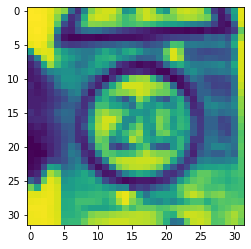

In [10]:
plt.imshow(X_test[990].reshape(32, 32)) 
print("Predicted sign: "+ str(model.predict_classes(X_test[990].reshape(1, 32, 32, 1)))) 
